# Assigning Coordinates to Each Crop

## Import relevant libraries and load data

In [43]:
import numpy as np
import pandas as pd
from random import seed
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme(style="dark", color_codes=True)
sns.set_palette("mako")
plt.rcParams["figure.figsize"] = (20,20)

In [32]:
# Read in data

resources_data = pd.read_excel("../data/interim/MasterSyntheticDatabase_v2.xlsx", header=0, usecols="B:M")

In [33]:
# Show first 5 rows

resources_data.head()
countries = resources_data["Country"].unique()

## Denote the borders of countries and generate points

In [34]:
# Define a square denoted by an x range and a y range for each country

def getBoundaries(country):
    if country == "Brazil":
        return [[-70.084311, -46.969077], [-11.214025, 2.352550]]
    elif country == "Colombia":
        return [-75.577474, -70.084311], [-2.891532, 4.047229]
    elif country == "Ecuador":
        return [-79.137045, -75.577474], [-3.725094, 0.886501]
    elif country == "Peru":
        return [-79.137045, -70.172201], [-12.504216, -3.725094]
    elif country == "Suriname":
        return [-57.911460, -54.258506], [2.352550, 5.842207]
    else:
        raise Exception("Country not defined")

In [37]:
# Seed random number generator
seed(1)

x_locations = []
y_locations = []

# If the crop is in this country, generate a random coordinate in this country
for i, crop in resources_data.iterrows():
    
    bx, by = getBoundaries(crop["Country"])
    x, y = random.uniform(bx[0], bx[1]), random.uniform(by[0], by[1])
    x_locations.append(x)
    y_locations.append(y)
    resources_data.at[i, "Location"] = str(x) + ", " + str(y)
    
resources_data.head()

,Crop,Category,Total Hectares,Production Hectares,Country,Location,Volume Kilos,Volume Tonnes,Total Workers,Worker Per Tonne,CO2 Per Tonne,Price Per Tonne
0,Abaca,Ornamental & medicinal plants,2016.89,8.20,Ecuador,"-78.65876593322058, 0.18292718409105735",16501.0,16.5010,143,8.666141,5090000,2030
1,Açaí,Fruit,309.60,245.84,Brazil,"-52.42948195909473, -7.753611932129204",161524.0,161.5240,2,0.012382,11850000,577
2,Asparagus,Vegetable,4351.63,431.87,Peru,"-74.69554673209434, -8.558079104309764",5482000.0,5482.0000,5793,1.056731,11850000,893
3,Asparagus,Vegetable,170.00,105.00,Peru,"-73.29561564804418, -5.579917476132492",926098.5,926.0985,97,0.104740,11850000,893
4,Asparagus,Vegetable,239.20,120.00,Peru,"-78.29560844666452, -12.25535004522117",1080000.0,1080.0000,337,0.312037,11850000,893


In [36]:
#resources_data.to_excel("../data/interim/MasterSyntheticDatabase_v3.xlsx")

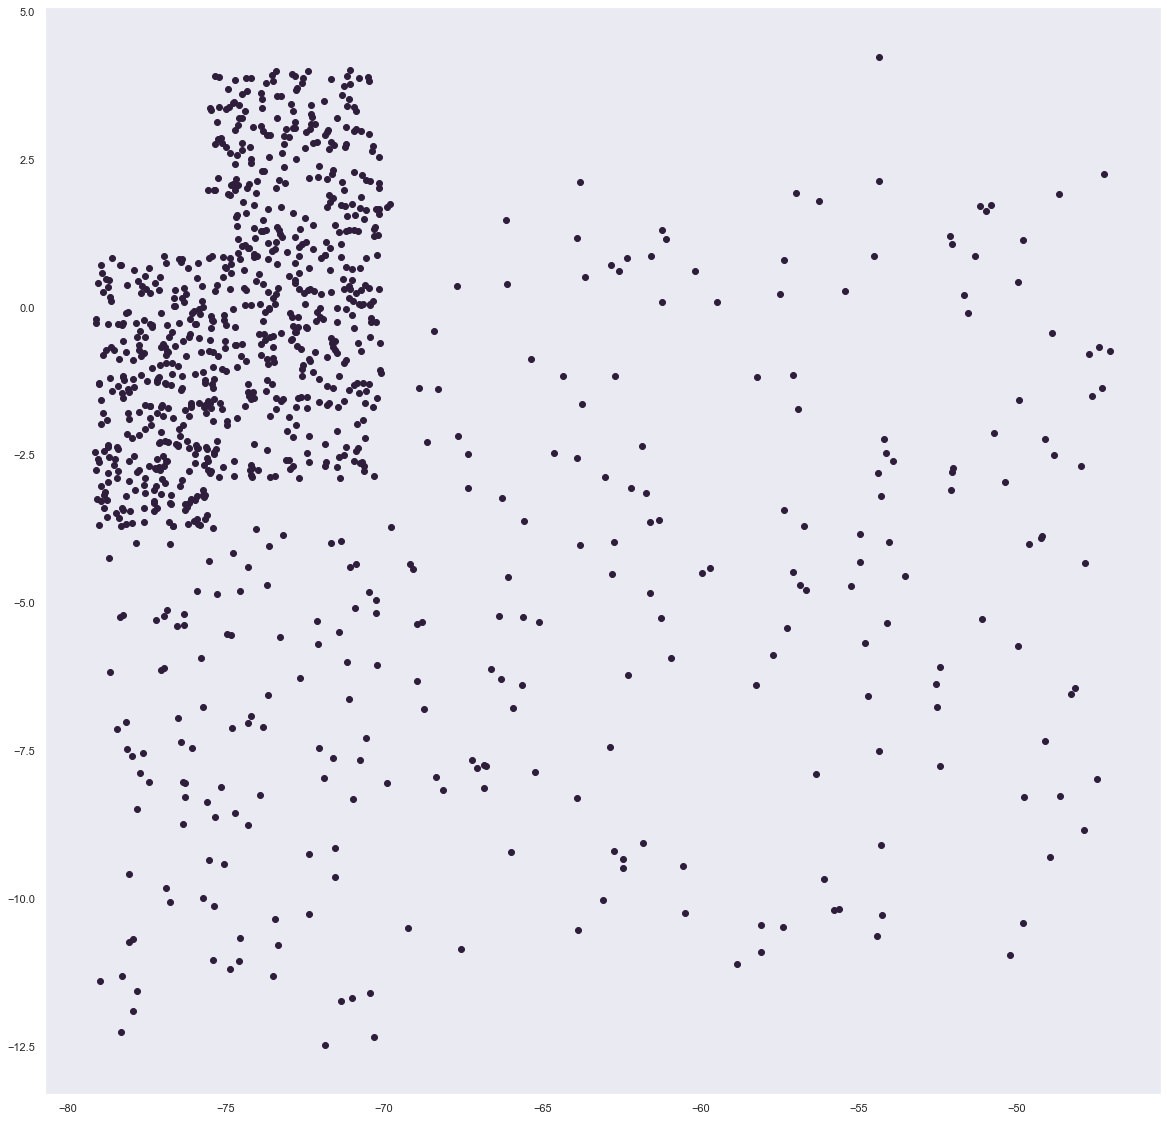

In [46]:
# We have a lot of concentrated points in Colombia and Equador, more spread out in Brasil and Peru

plt.scatter(x_locations, y_locations)
plt.show()

In [ ]:
# Do we care about plotting resources on a Map for the protoytpe